In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np

from pymdp.utils import obj_array, obj_array_uniform

from sweep import Sweep

In [ ]:
num_modalities       = 1  # [Play action obs]
num_factors          = 1  # [Play action state]
num_actions          = 2  # [C, D]
num_obs_categories   = 4  # [CC, CD, DC, DD]
num_state_categories = 4  # [CC, CD, DC, DD]

In [ ]:
""" Agent 0 """
A_k0 = obj_array(num_modalities)
A_k0[0] = np.eye(num_obs_categories)

B_k0 = obj_array(num_factors)
B_k0[0] = np.zeros((4, 4, 2))
B_k0[0][0, :, 0] = np.tile(0.5, 4)
B_k0[0][1, :, 0] = np.tile(0.5, 4)
B_k0[0][2, :, 1] = np.tile(0.5, 4)
B_k0[0][3, :, 1] = np.tile(0.5, 4)

C_k0 = obj_array(num_modalities)
C_k0[0] = np.array([3, 1, 4, 2])

D_k0 = obj_array_uniform([num_state_categories])

""" Agent 1 """
A_k1 = obj_array(num_modalities)
A_k1[0] = np.eye(num_obs_categories)

B_k1 = obj_array(num_factors)
B_k1[0] = np.zeros((4, 4, 2))
B_k1[0][0, :, 0] = np.tile(0.5, 4)
B_k1[0][2, :, 0] = np.tile(0.5, 4)
B_k1[0][1, :, 1] = np.tile(0.5, 4)
B_k1[0][3, :, 1] = np.tile(0.5, 4)

C_k1 = obj_array(num_modalities)
C_k1[0] = np.array([3, 4, 1, 2])

D_k1 = obj_array_uniform([num_state_categories])

NameError: name 'obj_array' is not defined

In [ ]:
config = {
    "T": 150,
    "K": 2,
    "A": [A_k0, A_k1],
    "B": [B_k0, B_k1],
    "C": [C_k0, C_k1],
    "D": [D_k0, D_k1], 
    "empathy_factor": [None, None],
    "actions": ["C", "D"],
    "learn": True,
    "policy_len": 1,
    "same_pref" : False
}

In [6]:
def generate_settings(factor=0.1):
    sequence = []
    current = 1.0
    while current >= 0:
        # Round to avoid floating-point precision issues
        first = round(current, 10)
        second = round(1 - first, 10)
        sequence.append([first, second])
        current -= factor
        if first <= 0:
            break
    return sequence

In [7]:
# ef_k0 = [[1, 0], [0.8, 0.2], [0.6, 0.4], [0.4, 0.6], [0.2, 0.8], [0, 1]]
# ef_k1 = [[1, 0], [0.8, 0.2], [0.6, 0.4], [0.4, 0.6], [0.2, 0.8], [0, 1]]

# ef_k0 = [[1, 0], [0.9, 0.1], [0.8, 0.2], [0.7, 0.3], [0.6, 0.4], [0.5, 0.5], [0.4, 0.6], [0.3, 0.7], [0.2, 0.8], [0.1, 0.9], [0, 1]]
# ef_k1 = [[1, 0], [0.9, 0.1], [0.8, 0.2], [0.7, 0.3], [0.6, 0.4], [0.5, 0.5], [0.4, 0.6], [0.3, 0.7], [0.2, 0.8], [0.1, 0.9], [0, 1]]

ef_k0 = generate_settings(factor=0.01)
ef_k1 = generate_settings(factor=0.01)
    
tuning_settings = [ef_k0, ef_k1]

In [8]:
sweep = Sweep(n_agents=2, 
              config=config, 
              tuning_vars=["empathy_factor"], 
              tuning_settings=tuning_settings)

results = sweep.run()

Setting: 0
Setting: 1
Setting: 2
Setting: 3
Setting: 4
Setting: 5
Setting: 6
Setting: 7
Setting: 8
Setting: 9
Setting: 10
Setting: 11
Setting: 12
Setting: 13
Setting: 14
Setting: 15
Setting: 16
Setting: 17
Setting: 18
Setting: 19
Setting: 20
Setting: 21
Setting: 22
Setting: 23
Setting: 24
Setting: 25
Setting: 26
Setting: 27
Setting: 28
Setting: 29
Setting: 30
Setting: 31
Setting: 32
Setting: 33
Setting: 34
Setting: 35
Setting: 36
Setting: 37
Setting: 38
Setting: 39
Setting: 40
Setting: 41
Setting: 42
Setting: 43
Setting: 44
Setting: 45
Setting: 46
Setting: 47
Setting: 48
Setting: 49
Setting: 50
Setting: 51
Setting: 52
Setting: 53
Setting: 54
Setting: 55
Setting: 56
Setting: 57
Setting: 58
Setting: 59
Setting: 60
Setting: 61
Setting: 62
Setting: 63
Setting: 64
Setting: 65
Setting: 66
Setting: 67
Setting: 68
Setting: 69
Setting: 70
Setting: 71
Setting: 72
Setting: 73
Setting: 74
Setting: 75
Setting: 76
Setting: 77
Setting: 78
Setting: 79
Setting: 80
Setting: 81
Setting: 82
Setting: 83
Se

/var/folders/fz/f7hj7sk97ql955pps6dd7dc80000gn/T/ipykernel_26416/4091362678.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', num_classes)  # Discrete version


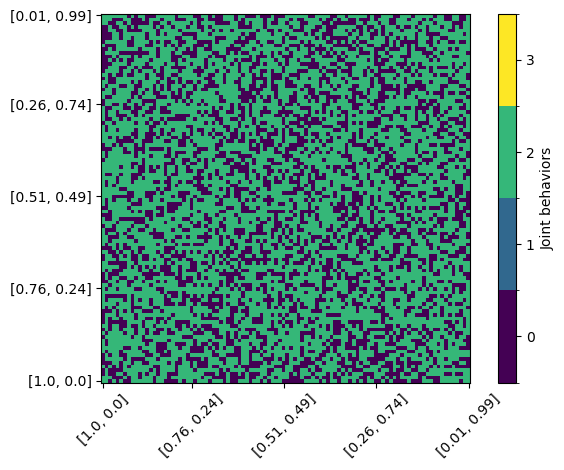

In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib import cm

# Create a mapping from setting tuple to index
setting_to_index = {tuple(setting): idx for idx, setting in enumerate(ef_k0)}

# Mapping to convert results to dummy encoding
action_mapping = {"CC": 0, "CD": 1, "DC": 2, "DD": 3}
results = [action_mapping[x] for x in sweep.results]

# Create an empty 6x6 matrix to hold the result values
n_options = len(ef_k0)
matrix = np.zeros((n_options, n_options))

# Fill in the matrix using the desired mapping
for idx, (i_setting, j_setting) in enumerate(sweep.combinations):
    i_tuple = tuple(i_setting)
    j_tuple = tuple(j_setting)
    
    row_index = n_options - 1 - setting_to_index[i_tuple]  # descending order
    col_index = setting_to_index[j_tuple]      # ascending order

    matrix[row_index, col_index] = results[idx]
    
# Create string labels
labels = [str(elem) for elem in ef_k0]

# Set up discrete colormap
num_classes = 4
cmap = cm.get_cmap('viridis', num_classes)  # Discrete version
norm = BoundaryNorm(boundaries=np.arange(-0.5, num_classes + 0.5, 1), ncolors=num_classes)

# 
num_labels = 5
tick_indices = np.linspace(0, len(labels) - 1, num_labels, dtype=int)
tick_labels = [str(labels[i]) for i in tick_indices]

# Plot heatmap
fig, ax = plt.subplots()
im = ax.imshow(matrix, cmap=cmap, norm=norm)

# Add discrete colorbar
cbar = plt.colorbar(im, ticks=np.arange(num_classes))
cbar.set_label('Joint behaviors')

# Label axes
xtick_labels = [str(setting) for setting in labels]
ytick_labels = list(reversed(xtick_labels))

# ax.set_xticks(np.arange(n_options))
# ax.set_xticklabels(xtick_labels, rotation=45)
# ax.set_yticks(np.arange(n_options))
# ax.set_yticklabels(ytick_labels)

ax.set_xticks(tick_indices)
ax.set_yticks(tick_indices)
ax.set_xticklabels(tick_labels, rotation=45)
ax.set_yticklabels(reversed(tick_labels))

# ax.set_title('Emapthy factor 11x hyperparameter sweep')

plt.tight_layout()
# plt.savefig('results/emapthy_sweep_11x.png', dpi=300)